<a href="https://colab.research.google.com/github/Elon-H/CU-E3B-tick-app-data-analysis/blob/main/Tick_app_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!git clone https://github.com/Elon-H/CU-E3B-tick-app-data-analysis.git

Cloning into 'CU-E3B-tick-app-data-analysis'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check the datasets users-pt1.xlsx and Tick app email and followup - followup pfizer 2 (20).csv

In [2]:
import pandas as pd

# Update these paths to reflect where your files are stored on Drive
appemail_path = '/content/drive/MyDrive/CU E3B lab/Tick App modeling /Data/Tick app email and followup - followup pfizer 2 (20).csv'
userspt1_path = '/content/drive/MyDrive/CU E3B lab/Tick App modeling /Data/users-pt1.xlsx'

df_email = pd.read_csv(appemail_path)
df_users = pd.read_excel(userspt1_path)

In [3]:
# Display the first few rows of each dataset
print("Pfizer Dataset (CSV):")
print(df_email.head(), "\n")

print("Users Dataset (Excel):")
print(df_users.head(), "\n")

Pfizer Dataset (CSV):
                          Email     State  CUTICK  Columbia  invitation  \
0  01-girders.infill@icloud.com  New York  CUTICK       1.0           1   
1          01johnpete@gmail.com  New York  CUTICK       1.0           1   
2            03toheeb@gmail.com  New York  CUTICK       1.0           1   
3              130365@gmail.com   Florida     NaN       0.0           1   
4            13plazal@gmail.com  New York  CUTICK       1.0           1   

         Giftcard sent  DL  points total_days_readable county_name STATE_NAME  \
0  ask to activate GPS   8     NaN                 NaN         NaN        NaN   
1                    N   9     2.0              0 days         NaN        NaN   
2                  NaN   0     NaN                 NaN         NaN        NaN   
3                  NaN   0     NaN                 NaN         NaN        NaN   
4                    Y   2     NaN                 NaN         NaN        NaN   

  median_time_diff_readable  centroid_la

## Cross-check the common email addresses

In [4]:
# Cross-check common email addresses:
# We use .str.lower() to ensure case-insensitive matching.
pfizer_emails = set(df_email['Email'].str.lower().dropna())
users_emails = set(df_users['username'].str.lower().dropna())

common_emails = pfizer_emails.intersection(users_emails)

In [5]:
# Convert the set to a sorted list
common_emails_list = sorted(list(common_emails))

print("Common Emails between the two datasets (Pfizer group):")
print(common_emails_list)

Common Emails between the two datasets (Pfizer group):
['01-girders.infill@icloud.com', '01johnpete@gmail.com', '03toheeb@gmail.com', '130365@gmail.com', '13plazal@gmail.com', '19dac83@gmail.com', '19mobrien@comcast.net', '19rpm88@gmail.com', '1areebababar@gmail.com', '1mdwatson1@gmail.com', '2mpurnell@gmail.com', '2xatkins@gmail.com', '3181976@gmail.com', '365.samuel.montoya@gmail.com', '3brandonk9@gmail.com', '4nd7ea@gmail.com', '6spdwagn@gmail.com', '945865548@qq.com', 'a.j.wodarczyk@gmail.com', 'a.r.negoita@gmail.com', 'a2sondhi@gmail.com', 'aaa794277@gmail.com', 'aaalberto7@hotmail.com', 'aanal.207@gmail.com', 'aaronchang1985@gmail.com', 'aaronjamesmufc@gmail.com', 'abaldassano468@gmail.com', 'abby.buckland@gmail.com', 'abbybee12345@gmail.com', 'abdulazeezsaad1102@gmail.com', 'abdullahimuhammedashraf222@gmail.com', 'abelman@stonybrookmedicine.edu', 'abertrand430@gmail.com', 'abhinitkothari@gmail.com', 'abhishek.ghevariya@trailx.com', 'abl88@cornell.edu', 'abmcmordie@gmail.com', 'a

In [7]:
df_email.rename(columns={'Email': 'email'}, inplace=True)
df_users.rename(columns={'username': 'email'}, inplace=True)

df_email['email'] = df_email['email'].str.lower()
df_users['email'] = df_users['email'].str.lower()

In [8]:
df_email_filtered = df_email[df_email['email'].isin(common_emails)]
df_users_filtered = df_users[df_users['email'].isin(common_emails)]

merged_df = pd.merge(df_email_filtered, df_users_filtered, on='email', how='inner')

print("merged table:")
print(merged_df.head())

merged table:
                          email     State  CUTICK  Columbia  invitation  \
0  01-girders.infill@icloud.com  New York  CUTICK       1.0           1   
1          01johnpete@gmail.com  New York  CUTICK       1.0           1   
2            03toheeb@gmail.com  New York  CUTICK       1.0           1   
3              130365@gmail.com   Florida     NaN       0.0           1   
4            13plazal@gmail.com  New York  CUTICK       1.0           1   

         Giftcard sent  DL  points total_days_readable county_name  ...  \
0  ask to activate GPS   8     NaN                 NaN         NaN  ...   
1                    N   9     2.0              0 days         NaN  ...   
2                  NaN   0     NaN                 NaN         NaN  ...   
3                  NaN   0     NaN                 NaN         NaN  ...   
4                    Y   2     NaN                 NaN         NaN  ...   

  centroid_longitude            location_centroid  comments  \
0                NaN 

In [9]:
merged_df.to_csv('/content/drive/MyDrive/CU E3B lab/Tick app/merged_output.csv', index=False)

## Some initial analysis to the merged_output

In [10]:
print(merged_df.columns.tolist())

['email', 'State', 'CUTICK', 'Columbia', 'invitation', 'Giftcard sent', 'DL', 'points', 'total_days_readable', 'county_name', 'STATE_NAME', 'median_time_diff_readable', 'centroid_latitude', 'centroid_longitude', 'location_centroid', 'comments', 'user_id', 'user_state', 'user_study_arm', 'user_language', 'baseline_complete', 'most_recent_activity', 'last_device_used']


In [11]:
print(merged_df.shape)

(2731, 23)


In [13]:
num_missing = merged_df[merged_df['centroid_latitude'].isnull() | merged_df['centroid_longitude'].isnull()].shape[0]
print("The number of users with missing gps data", num_missing)

The number of users with missing gps data 1075


In [14]:
# drop null in the gps data
df_gps_valid = merged_df.dropna(subset=['centroid_latitude', 'centroid_longitude'])

# define the condition
in_north_america = (
    (df_gps_valid['centroid_longitude'] >= -170) &
    (df_gps_valid['centroid_longitude'] <= -50) &
    (df_gps_valid['centroid_latitude'] >= 15) &
    (df_gps_valid['centroid_latitude'] <= 75)
)

# choose who is not in north america
not_in_north_america = df_gps_valid[~in_north_america]

print("users who are not in north america：", not_in_north_america.shape[0])

users who are not in north america： 149


In [15]:
import matplotlib.pyplot as plt

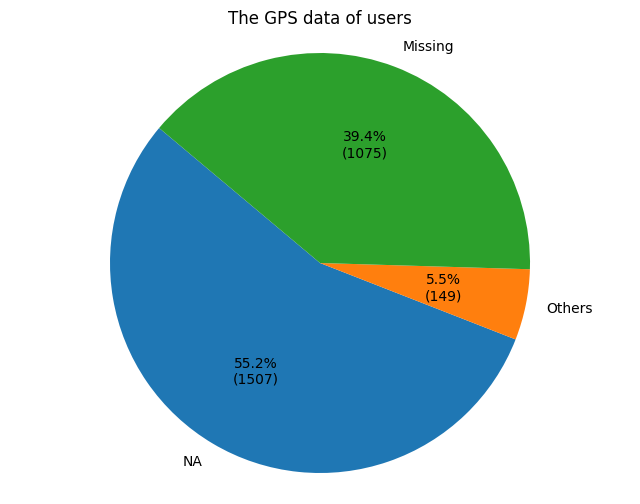

In [18]:
count_na = df_gps_valid[in_north_america].shape[0]
count_other = df_gps_valid[~in_north_america].shape[0]
categories = ['NA', 'Others', 'Missing']
counts = [count_na, count_other, num_missing]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        absolute = int(round(pct * total / 100.0))
        return '{:.1f}%\n({:d})'.format(pct, absolute)
    return my_autopct

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=categories, autopct=make_autopct(counts), startangle=140)
plt.title('The GPS data of users')
plt.axis('equal')  # Keep to be circle
plt.show()

## Plot the GPS data in the map

In [19]:
!pip install folium

In [20]:
import folium

In [23]:
map_center = [df_gps_valid['centroid_latitude'].mean(), df_gps_valid['centroid_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=4)

for idx, row in df_gps_valid.iterrows():
    lat = row['centroid_latitude']
    lon = row['centroid_longitude']
    # add info to every point
    popup_text = f"Email: {row['email']}<br>Latitude: {lat}<br>Longitude: {lon}"
    folium.Marker(location=[lat, lon], popup=popup_text).add_to(m)

m.save('map_with_gps.html')

## Remove the scammers(users from Nigeria)

In [29]:
# Find people in Nigeria
in_nigeria = (
    (merged_df['centroid_longitude'] >= -9) &
    (merged_df['centroid_longitude'] <= 9) &
    (merged_df['centroid_latitude'] >= 4) &
    (merged_df['centroid_latitude'] <= 15)
)

# Find people who have available gps data
gps_valid = merged_df['centroid_latitude'].notnull() & merged_df['centroid_longitude'].notnull()

# Remove them from the merged table
not_in_nigeria = ~in_nigeria

gps_not_valid = ~gps_valid

gps_valid_not_in_nigeria = not_in_nigeria & gps_valid

df_nonigeria = merged_df[gps_valid_not_in_nigeria | gps_not_valid]

In [31]:
print(df_nonigeria.columns.tolist())

['email', 'State', 'CUTICK', 'Columbia', 'invitation', 'Giftcard sent', 'DL', 'points', 'total_days_readable', 'county_name', 'STATE_NAME', 'median_time_diff_readable', 'centroid_latitude', 'centroid_longitude', 'location_centroid', 'comments', 'user_id', 'user_state', 'user_study_arm', 'user_language', 'baseline_complete', 'most_recent_activity', 'last_device_used']


## Merge it with baseline.xlsx and select the adult users

In [32]:
baseline_path = '/content/drive/MyDrive/CU E3B lab/Tick app/Tick App modeling /Data/baseline.xlsx'
df_baseline = pd.read_excel(baseline_path)

In [34]:
print(df_baseline.columns.tolist())

['user id', 'user state', 'user study arm', 'survey id', 'survey type', 'survey status', 'complete date', 'What is your gender? (a3be258a-af20-1448-d9b5-1b6f5e6b9257)', 'What is your age? (in years) (49020c58-c0cb-52c1-bf25-428e6e3e8f57)', 'Zipcode (6c8bd6db-c37f-22f0-6b6d-3f33fb9f9547)', 'City (ef255cb7-c8fc-dcea-f5c6-fe580120f508)', 'State * (68d53b50-385e-c302-35b9-fd9404fae9e3)', 'How did you hear about the Tick App? (select all that apply) (c89ed9c7-9cf3-fb26-41c4-2e57291741bb)', 'How did you hear about the Tick App? (9a001c1f-5144-ce7e-b25d-4d6711982da0)', 'Which study are you participating in?  (6a670f1f-a287-4178-950c-56c6e5ecbaf4)', 'Please enter your study code if you have one (66b71868-9c22-4d8a-ad0a-87499bb5b389)', 'When were you most recently bitten by a tick? (5e326d8d-a7f8-3bfc-15a4-673904ac55bb)', 'Lyme disease (994461e7-6de0-bfb8-19a7-cbe23055f03b)', 'Babesiosis (d5dfbbce-262f-d7fa-46ab-acf214c232ae)', 'Anaplasmosis (4e387a89-edd0-fd09-704c-a23e4a65cec6)', 'Other (50d0

In [37]:
# Replace the space in df_baseline to _ and make all str lower to make it the same as df_nonigeria
df_baseline.columns = df_baseline.columns.str.replace(' ', '_').str.lower()

df_nonigeria.columns = df_nonigeria.columns.str.replace(' ', '_').str.lower()

print(df_baseline.columns.tolist())
print(df_nonigeria.columns.tolist())

['user_id', 'user_state', 'user_study_arm', 'survey_id', 'survey_type', 'survey_status', 'complete_date', 'what_is_your_gender?_(a3be258a-af20-1448-d9b5-1b6f5e6b9257)', 'what_is_your_age?_(in_years)_(49020c58-c0cb-52c1-bf25-428e6e3e8f57)', 'zipcode_(6c8bd6db-c37f-22f0-6b6d-3f33fb9f9547)', 'city_(ef255cb7-c8fc-dcea-f5c6-fe580120f508)', 'state_*_(68d53b50-385e-c302-35b9-fd9404fae9e3)', 'how_did_you_hear_about_the_tick_app?_(select_all_that_apply)_(c89ed9c7-9cf3-fb26-41c4-2e57291741bb)', 'how_did_you_hear_about_the_tick_app?_(9a001c1f-5144-ce7e-b25d-4d6711982da0)', 'which_study_are_you_participating_in?__(6a670f1f-a287-4178-950c-56c6e5ecbaf4)', 'please_enter_your_study_code_if_you_have_one_(66b71868-9c22-4d8a-ad0a-87499bb5b389)', 'when_were_you_most_recently_bitten_by_a_tick?_(5e326d8d-a7f8-3bfc-15a4-673904ac55bb)', 'lyme_disease_(994461e7-6de0-bfb8-19a7-cbe23055f03b)', 'babesiosis_(d5dfbbce-262f-d7fa-46ab-acf214c232ae)', 'anaplasmosis_(4e387a89-edd0-fd09-704c-a23e4a65cec6)', 'other_(50d0

In [39]:
common_cols = set(df_nonigeria.columns).intersection(set(df_baseline.columns))
common_cols.discard('user_id')
common_cols = list(common_cols)
print("common columns：", common_cols)

# Extract user_id and common columns from these 2 datasets
df1 = df_nonigeria[['user_id'] + common_cols]
df2 = df_baseline[['user_id'] + common_cols]

# Use different name to distinguish them
merged_common = pd.merge(df1, df2, on='user_id', suffixes=('_nonigeria', '_baseline'))

# Check whether it is the same value for the same user_id
for col in common_cols:
    col1 = f"{col}_nonigeria"
    col2 = f"{col}_baseline"
    equal_series = merged_common[col1] == merged_common[col2]

    total = len(equal_series)
    mismatches = (~equal_series).sum()

    print(f"The column '{col}': {total - mismatches} same values, {mismatches} mismatches（total num: {total}）")

    # check the detail if there is any difference
    if mismatches > 0:
        print(merged_common.loc[~equal_series, ['user_id', col1, col2]].head(), "\n")

common columns： ['user_state', 'user_study_arm']
The column 'user_state': 2595 same values, 6 mismatches（total num: 2601）
                                   user_id user_state_nonigeria  \
1312  8dd86cb3-cb7a-75fa-069b-9c6ad5972a37                  NaN   
1344  6467ec29-15ff-1139-8262-b17ce0ee5d33                  NaN   
1481  60a92e13-61d9-969d-b38d-914f5ebe3f19                  NaN   
1535  5e4d744c-97dc-445d-9ce1-ca53edf87b2f                  NaN   
1984  47fa1d28-77cf-6e52-5659-86651a28068e                  NaN   

     user_state_baseline  
1312                 NaN  
1344                 NaN  
1481                 NaN  
1535                 NaN  
1984                 NaN   

The column 'user_study_arm': 2601 same values, 0 mismatches（total num: 2601）


In [40]:
df_baseline_reduced = df_baseline.drop(columns=['user_state', 'user_study_arm'])

# Merge through the same user_id
merged_df = pd.merge(df_nonigeria, df_baseline_reduced, on='user_id', how='left')

print("The columns after merging: ", merged_df.columns.tolist())

The columns after merging:  ['email', 'state', 'cutick', 'columbia', 'invitation', 'giftcard_sent', 'dl', 'points', 'total_days_readable', 'county_name', 'state_name', 'median_time_diff_readable', 'centroid_latitude', 'centroid_longitude', 'location_centroid', 'comments', 'user_id', 'user_state', 'user_study_arm', 'user_language', 'baseline_complete', 'most_recent_activity', 'last_device_used', 'survey_id', 'survey_type', 'survey_status', 'complete_date', 'what_is_your_gender?_(a3be258a-af20-1448-d9b5-1b6f5e6b9257)', 'what_is_your_age?_(in_years)_(49020c58-c0cb-52c1-bf25-428e6e3e8f57)', 'zipcode_(6c8bd6db-c37f-22f0-6b6d-3f33fb9f9547)', 'city_(ef255cb7-c8fc-dcea-f5c6-fe580120f508)', 'state_*_(68d53b50-385e-c302-35b9-fd9404fae9e3)', 'how_did_you_hear_about_the_tick_app?_(select_all_that_apply)_(c89ed9c7-9cf3-fb26-41c4-2e57291741bb)', 'how_did_you_hear_about_the_tick_app?_(9a001c1f-5144-ce7e-b25d-4d6711982da0)', 'which_study_are_you_participating_in?__(6a670f1f-a287-4178-950c-56c6e5ecbaf4

In [43]:
print(merged_df.shape[0])

2602


In [45]:
# Select only adults
age_col = "what_is_your_age?_(in_years)_(49020c58-c0cb-52c1-bf25-428e6e3e8f57)"

merged_df[age_col] = pd.to_numeric(merged_df[age_col], errors='coerce')

merged_df = merged_df[merged_df[age_col] >= 18]

print("After age filter, the num of users：", merged_df.shape[0])

After age filter, the num of users： 2577


In [49]:
# Define the pairs of columns to compare
column_pairs = [
    ('state', 'user_state'),
    ('state', 'state_*_(68d53b50-385e-c302-35b9-fd9404fae9e3)'),
    ('user_state', 'state_*_(68d53b50-385e-c302-35b9-fd9404fae9e3)')
]

# Iterate through each pair and display differences along with user_id
for col1, col2 in column_pairs:
    # Select rows where the two columns differ
    differences = merged_df[merged_df[col1] != merged_df[col2]][['user_id', col1, col2]]
    if not differences.empty:
        print(f"Differences between '{col1}' and '{col2}':")
        print(differences.head(), "\n")
    else:
        print(f"No differences between '{col1}' and '{col2}'.")

Differences between 'state' and 'user_state':
                                   user_id              state  \
1313  8dd86cb3-cb7a-75fa-069b-9c6ad5972a37           New York   
1345  6467ec29-15ff-1139-8262-b17ce0ee5d33           New York   
1482  60a92e13-61d9-969d-b38d-914f5ebe3f19               Ohio   
1536  5e4d744c-97dc-445d-9ce1-ca53edf87b2f           New York   
1602  fd526c02-6e9f-827e-e729-51532db43a54  Outside of the US   

                    user_state  
1313                       NaN  
1345                       NaN  
1482                       NaN  
1536                       NaN  
1602  Afuera de Estados Unidos   

Differences between 'state' and 'state_*_(68d53b50-385e-c302-35b9-fd9404fae9e3)':
                                   user_id              state  \
1602  fd526c02-6e9f-827e-e729-51532db43a54  Outside of the US   

     state_*_(68d53b50-385e-c302-35b9-fd9404fae9e3)  
1602                       Afuera de Estados Unidos   

Differences between 'user_state' and 'st

In [50]:
# Drop the duplicate column because it is identical to 'state'
merged_df = merged_df.drop(columns=["state_*_(68d53b50-385e-c302-35b9-fd9404fae9e3)"])

# Print the updated list of columns
print("Updated columns after dropping the duplicate column:")
print(merged_df.columns.tolist())

Updated columns after dropping the duplicate column:
['email', 'state', 'cutick', 'columbia', 'invitation', 'giftcard_sent', 'dl', 'points', 'total_days_readable', 'county_name', 'state_name', 'median_time_diff_readable', 'centroid_latitude', 'centroid_longitude', 'location_centroid', 'comments', 'user_id', 'user_state', 'user_study_arm', 'user_language', 'baseline_complete', 'most_recent_activity', 'last_device_used', 'survey_id', 'survey_type', 'survey_status', 'complete_date', 'what_is_your_gender?_(a3be258a-af20-1448-d9b5-1b6f5e6b9257)', 'what_is_your_age?_(in_years)_(49020c58-c0cb-52c1-bf25-428e6e3e8f57)', 'zipcode_(6c8bd6db-c37f-22f0-6b6d-3f33fb9f9547)', 'city_(ef255cb7-c8fc-dcea-f5c6-fe580120f508)', 'how_did_you_hear_about_the_tick_app?_(select_all_that_apply)_(c89ed9c7-9cf3-fb26-41c4-2e57291741bb)', 'how_did_you_hear_about_the_tick_app?_(9a001c1f-5144-ce7e-b25d-4d6711982da0)', 'which_study_are_you_participating_in?__(6a670f1f-a287-4178-950c-56c6e5ecbaf4)', 'please_enter_your_st

In [51]:
merged_df.to_csv('/content/drive/MyDrive/CU E3B lab/Tick app/merged_output_filtered.csv', index=False)